## 1. Import Necessary libraries

In [ ]:
!pip install xgboost

In [ ]:
!pip install lightgbm

In [1]:
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier,GradientBoostingClassifier,AdaBoostClassifier
import xgboost as xgb
import lightgbm as lgb
from sklearn.preprocessing import LabelEncoder
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier

from sklearn.metrics import accuracy_score,precision_score,recall_score,confusion_matrix

import warnings
warnings.filterwarnings('ignore')

## 2. Import Data

In [2]:
credit_card_data = pd.read_csv('credit_card_clean.csv')
credit_card_data

FileNotFoundError: ignored

## 3. Data Understanding

### Exploring the variable
* ID : ID of each client

* LIMIT_BAL: Amount of given credit in NT dollars (includes individual and family/supplementary credit)

* SEX: Gender (1=male, 2=female)

* EDUCATION: (1=graduate school, 2=university, 3=high school, 4=others, 5=unknown, 6=unknown)

* MARRIAGE: Marital status (1=married, 2=single, 3=others)

* AGE: Age in years

* PAY_1: Repayment status in September, 2005 (-2 = No consumption, -1 = paid in full, 0 = use of revolving credit (paid minimum only), 1 = payment delay for one month, 2 = payment delay for two months, ... 8 = payment delay for eight months, 9 = payment delay for nine months and above)

* PAY_2: Repayment status in August, 2005 (scale same as above)

* PAY_3: Repayment status in July, 2005 (scale same as above)

* PAY_4: Repayment status in June, 2005 (scale same as above)

* PAY_5: Repayment status in May, 2005 (scale same as above)

* PAY_6: Repayment status in April, 2005 (scale same as above)

* BILL_AMT1: Amount of bill statement in September, 2005 (NT dollar)

* BILL_AMT2: Amount of bill statement in August, 2005 (NT dollar)

* BILL_AMT3: Amount of bill statement in July, 2005 (NT dollar)

* BILL_AMT4: Amount of bill statement in June, 2005 (NT dollar)

* BILL_AMT5: Amount of bill statement in May, 2005 (NT dollar)

* BILL_AMT6: Amount of bill statement in April, 2005 (NT dollar)

* PAY_AMT1: Amount of previous payment in September, 2005 (NT dollar)

* PAY_AMT2: Amount of previous payment in August, 2005 (NT dollar)

* PAY_AMT3: Amount of previous payment in July, 2005 (NT dollar)

* PAY_AMT4: Amount of previous payment in June, 2005 (NT dollar)

* PAY_AMT5: Amount of previous payment in May, 2005 (NT dollar)

* PAY_AMT6: Amount of previous payment in April, 2005 (NT dollar)

#### Target variable
default.payment.next.month: Default payment (1=yes, 0=no)

###### Note: NT is Taiwain Dollars

## 3. Data Understanding

In [ ]:
credit_card_data.shape

(30000, 25)

In [ ]:
credit_card_data.isna().sum()

ID           0
LIMIT_BAL    0
SEX          0
EDUCATION    0
MARRIAGE     0
AGE          0
PAY_1        0
PAY_2        0
PAY_3        0
PAY_4        0
PAY_5        0
PAY_6        0
BILL_AMT1    0
BILL_AMT2    0
BILL_AMT3    0
BILL_AMT4    0
BILL_AMT5    0
BILL_AMT6    0
PAY_AMT1     0
PAY_AMT2     0
PAY_AMT3     0
PAY_AMT4     0
PAY_AMT5     0
PAY_AMT6     0
DEFAULT      0
dtype: int64

In [ ]:
credit_card_data.dtypes

ID             int64
LIMIT_BAL    float64
SEX           object
EDUCATION     object
MARRIAGE      object
AGE            int64
PAY_1          int64
PAY_2          int64
PAY_3          int64
PAY_4          int64
PAY_5          int64
PAY_6          int64
BILL_AMT1    float64
BILL_AMT2    float64
BILL_AMT3    float64
BILL_AMT4    float64
BILL_AMT5    float64
BILL_AMT6    float64
PAY_AMT1     float64
PAY_AMT2     float64
PAY_AMT3     float64
PAY_AMT4     float64
PAY_AMT5     float64
PAY_AMT6     float64
DEFAULT        int64
dtype: object

## 4. Data Preprocessing

In [ ]:
le = LabelEncoder()
credit_card_data['SEX']       = le.fit_transform(credit_card_data['SEX'])
credit_card_data['EDUCATION'] = le.fit_transform(credit_card_data['EDUCATION'])
credit_card_data['MARRIAGE']  = le.fit_transform(credit_card_data['MARRIAGE'])
credit_card_data

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_1,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,DEFAULT
0,1,20000.0,0,3,0,24,2,2,-1,-1,...,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1
1,2,120000.0,0,3,2,26,-1,2,0,0,...,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1
2,3,90000.0,0,3,2,34,0,0,0,0,...,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0
3,4,50000.0,0,3,0,37,0,0,0,0,...,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0
4,5,50000.0,1,3,0,57,-1,0,-1,0,...,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29995,29996,220000.0,1,1,0,39,0,0,0,0,...,88004.0,31237.0,15980.0,8500.0,20000.0,5003.0,3047.0,5000.0,1000.0,0
29996,29997,150000.0,1,1,2,43,-1,-1,-1,-1,...,8979.0,5190.0,0.0,1837.0,3526.0,8998.0,129.0,0.0,0.0,0
29997,29998,30000.0,1,3,2,37,4,3,2,-1,...,20878.0,20582.0,19357.0,0.0,0.0,22000.0,4200.0,2000.0,3100.0,1
29998,29999,80000.0,1,1,0,41,1,-1,0,0,...,52774.0,11855.0,48944.0,85900.0,3409.0,1178.0,1926.0,52964.0,1804.0,1


In [ ]:
credit_card_data.dtypes

ID             int64
LIMIT_BAL    float64
SEX            int64
EDUCATION      int32
MARRIAGE       int32
AGE            int64
PAY_1          int64
PAY_2          int64
PAY_3          int64
PAY_4          int64
PAY_5          int64
PAY_6          int64
BILL_AMT1    float64
BILL_AMT2    float64
BILL_AMT3    float64
BILL_AMT4    float64
BILL_AMT5    float64
BILL_AMT6    float64
PAY_AMT1     float64
PAY_AMT2     float64
PAY_AMT3     float64
PAY_AMT4     float64
PAY_AMT5     float64
PAY_AMT6     float64
DEFAULT        int64
dtype: object

In [ ]:
del credit_card_data['ID']

In [ ]:
credit_card_data

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_1,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,DEFAULT
0,20000.0,0,3,0,24,2,2,-1,-1,-2,...,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1
1,120000.0,0,3,2,26,-1,2,0,0,0,...,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1
2,90000.0,0,3,2,34,0,0,0,0,0,...,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0
3,50000.0,0,3,0,37,0,0,0,0,0,...,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0
4,50000.0,1,3,0,57,-1,0,-1,0,0,...,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29995,220000.0,1,1,0,39,0,0,0,0,0,...,88004.0,31237.0,15980.0,8500.0,20000.0,5003.0,3047.0,5000.0,1000.0,0
29996,150000.0,1,1,2,43,-1,-1,-1,-1,0,...,8979.0,5190.0,0.0,1837.0,3526.0,8998.0,129.0,0.0,0.0,0
29997,30000.0,1,3,2,37,4,3,2,-1,0,...,20878.0,20582.0,19357.0,0.0,0.0,22000.0,4200.0,2000.0,3100.0,1
29998,80000.0,1,1,0,41,1,-1,0,0,0,...,52774.0,11855.0,48944.0,85900.0,3409.0,1178.0,1926.0,52964.0,1804.0,1


In [ ]:
pd.set_option('max_columns',None) #No restrictions should be given for displaying columns

In [ ]:
credit_card_data.head(10)

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_1,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,DEFAULT
0,20000.0,0,3,0,24,2,2,-1,-1,-2,-2,3913.0,3102.0,689.0,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1
1,120000.0,0,3,2,26,-1,2,0,0,0,2,2682.0,1725.0,2682.0,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1
2,90000.0,0,3,2,34,0,0,0,0,0,0,29239.0,14027.0,13559.0,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0
3,50000.0,0,3,0,37,0,0,0,0,0,0,46990.0,48233.0,49291.0,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0
4,50000.0,1,3,0,57,-1,0,-1,0,0,0,8617.0,5670.0,35835.0,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0
5,50000.0,1,0,2,37,0,0,0,0,0,0,64400.0,57069.0,57608.0,19394.0,19619.0,20024.0,2500.0,1815.0,657.0,1000.0,1000.0,800.0,0
6,500000.0,1,0,2,29,0,0,0,0,0,0,367965.0,412023.0,445007.0,542653.0,483003.0,473944.0,55000.0,40000.0,38000.0,20239.0,13750.0,13770.0,0
7,100000.0,0,3,2,23,0,-1,-1,0,0,-1,11876.0,380.0,601.0,221.0,-159.0,567.0,380.0,601.0,0.0,581.0,1687.0,1542.0,0
8,140000.0,0,1,0,28,0,0,2,0,0,0,11285.0,14096.0,12108.0,12211.0,11793.0,3719.0,3329.0,0.0,432.0,1000.0,1000.0,1000.0,0
9,20000.0,1,1,2,35,-2,-2,-2,-2,-1,-1,0.0,0.0,0.0,0.0,13007.0,13912.0,0.0,0.0,0.0,13007.0,1122.0,0.0,0


## 5. Model Building

In [ ]:
X = credit_card_data.drop('DEFAULT',axis = 1)
y = credit_card_data[['DEFAULT']]

In [ ]:
y.value_counts()

DEFAULT
0          23364
1           6636
dtype: int64

In [ ]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.20,random_state=123,stratify=y)

In [ ]:
X_train.shape,y_train.shape

((24000, 23), (24000, 1))

In [ ]:
X_test.shape,y_train.shape

((6000, 23), (24000, 1))

## 6. Model Training

In [ ]:
rfclassifier    = RandomForestClassifier()
adb_classifier  = AdaBoostClassifier()
gb_classifier   = GradientBoostingClassifier()
xgb_classifer   = XGBClassifier()
lgbm_classifier = LGBMClassifier()

In [ ]:
%%time
rfclassifier.fit(X_train,y_train)

Wall time: 6.99 s


RandomForestClassifier()

In [ ]:
%%time
adb_classifier.fit(X_train,y_train)

Wall time: 2.38 s


AdaBoostClassifier()

In [ ]:
%%time
gb_classifier.fit(X_train,y_train)

Wall time: 10.2 s


GradientBoostingClassifier()

In [ ]:
%%time
xgb_classifer.fit(X_train,y_train)

[16:16:57] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Wall time: 4.1 s


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
              gamma=0, gpu_id=-1, importance_type=None,
              interaction_constraints='', learning_rate=0.300000012,
              max_delta_step=0, max_depth=6, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=100, n_jobs=4,
              num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [ ]:
%%time
lgbm_classifier.fit(X_train,y_train)

Wall time: 495 ms


LGBMClassifier()

## 7. Model Testing

In [ ]:
rf_pred  = rfclassifier.predict(X_test)
adb_pred = adb_classifier.predict(X_test)
gb_pred  = gb_classifier.predict(X_test)
xgb_pred = xgb_classifer.predict(X_test)
lgb_pred = lgbm_classifier.predict(X_test)

## 8. Model Evaluation

### 1.Random Forest Evaluation

In [ ]:
from sklearn.metrics import classification_report

In [ ]:
print('Accuracy Score  : ',round(accuracy_score(y_test,rf_pred),4))
print('Precision Score : ',round(precision_score(y_test,rf_pred),4))
print('Recall Score    : ',round(recall_score(y_test,rf_pred),4))
print('Confusion Matrix:\n',confusion_matrix(y_test,rf_pred))

Accuracy Score  :  0.8167
Precision Score :  0.6553
Recall Score    :  0.361
Confusion Matrix:
 [[4421  252]
 [ 848  479]]


### 2. AdaBoost Classifier

In [ ]:
print('Accuracy Score  : ',round(accuracy_score(y_test,adb_pred),4))
print('Precision Score : ',round(precision_score(y_test,adb_pred),4))
print('Recall Score    : ',round(recall_score(y_test,adb_pred),4))
print('Confusion Matrix:\n',confusion_matrix(y_test,adb_pred))

Accuracy Score  :  0.8178
Precision Score :  0.7045
Recall Score    :  0.3037
Confusion Matrix:
 [[4504  169]
 [ 924  403]]


### 3. Gradient Boosting Classifier

In [ ]:
print('Accuracy Score  : ',round(accuracy_score(y_test,gb_pred),4))
print('Precision Score : ',round(precision_score(y_test,gb_pred),4))
print('Recall Score    : ',round(recall_score(y_test,gb_pred),4))
print('Confusion Matrix:\n',confusion_matrix(y_test,gb_pred))

Accuracy Score  :  0.823
Precision Score :  0.6912
Recall Score    :  0.361
Confusion Matrix:
 [[4459  214]
 [ 848  479]]


### 4. Extreme Gradient Boosting Classifier

In [ ]:
print('Accuracy Score  : ',round(accuracy_score(y_test,xgb_pred),4))
print('Precision Score : ',round(precision_score(y_test,xgb_pred),4))
print('Recall Score    : ',round(recall_score(y_test,xgb_pred),4))
print('Confusion Matrix:\n',confusion_matrix(y_test,xgb_pred))

Accuracy Score  :  0.8162
Precision Score :  0.6573
Recall Score    :  0.3527
Confusion Matrix:
 [[4429  244]
 [ 859  468]]


### 5. LightGBM Classifier

In [ ]:
print('Accuracy Score  : ',round(accuracy_score(y_test,lgb_pred),4))
print('Precision Score : ',round(precision_score(y_test,lgb_pred),4))
print('Recall Score    : ',round(recall_score(y_test,lgb_pred),4))
print('Confusion Matrix:\n',confusion_matrix(y_test,lgb_pred))

Accuracy Score  :  0.825
Precision Score :  0.6981
Recall Score    :  0.3677
Confusion Matrix:
 [[4462  211]
 [ 839  488]]


## ========================================================================

# FEATURE IMPORTANCE

In [ ]:
X_train.shape

(24000, 23)

In [ ]:
rf_features  = rfclassifier.feature_importances_
adb_features = adb_classifier.feature_importances_
gb_features  = gb_classifier.feature_importances_
xgb_features = xgb_classifer.feature_importances_
lgb_features = lgbm_classifier.feature_importances_

In [ ]:
feature_importance_df = pd.DataFrame(data = {'Features'         :X_train.columns,
                                             'RF_Features'      :rf_features,
                                             'AdaBoost_Features':adb_features,
                                             'GB_Features'      :gb_features,
                                             'XGB_Features'     :xgb_features,
                                             'LGB_Features'     :lgb_features})
feature_importance_df

,Features,RF_Features,AdaBoost_Features,GB_Features,XGB_Features,LGB_Features
0,LIMIT_BAL,0.059995,0.06,0.031109,0.023286,236
1,SEX,0.012412,0.02,0.002236,0.018304,40
2,EDUCATION,0.018388,0.00,0.004155,0.020551,72
3,MARRIAGE,0.012980,0.02,0.003175,0.017666,35
4,AGE,0.067484,0.02,0.007463,0.016494,217
5,PAY_1,0.094243,0.14,0.616385,0.377159,98
6,PAY_2,0.041009,0.06,0.088202,0.117947,44
7,PAY_3,0.031120,0.00,0.040539,0.044117,52
8,PAY_4,0.024454,0.02,0.015628,0.042392,36
9,PAY_5,0.020276,0.02,0.013072,0.034574,38


## 1. Display the important features of Random Forest

In [ ]:
rf_imp_features = feature_importance_df.sort_values(by ='RF_Features' ,ascending = False)
rf_imp_features

,Features,RF_Features,AdaBoost_Features,GB_Features,XGB_Features,LGB_Features
5,PAY_1,0.094243,0.14,0.616385,0.377159,98
4,AGE,0.067484,0.02,0.007463,0.016494,217
11,BILL_AMT1,0.060917,0.12,0.029876,0.023537,213
0,LIMIT_BAL,0.059995,0.06,0.031109,0.023286,236
12,BILL_AMT2,0.055161,0.06,0.009788,0.021952,173
17,PAY_AMT1,0.052357,0.04,0.022810,0.021157,170
13,BILL_AMT3,0.051900,0.06,0.007632,0.020486,161
16,BILL_AMT6,0.051039,0.02,0.006485,0.018825,138
14,BILL_AMT4,0.050327,0.04,0.007282,0.020854,152
15,BILL_AMT5,0.050284,0.04,0.005615,0.019574,142


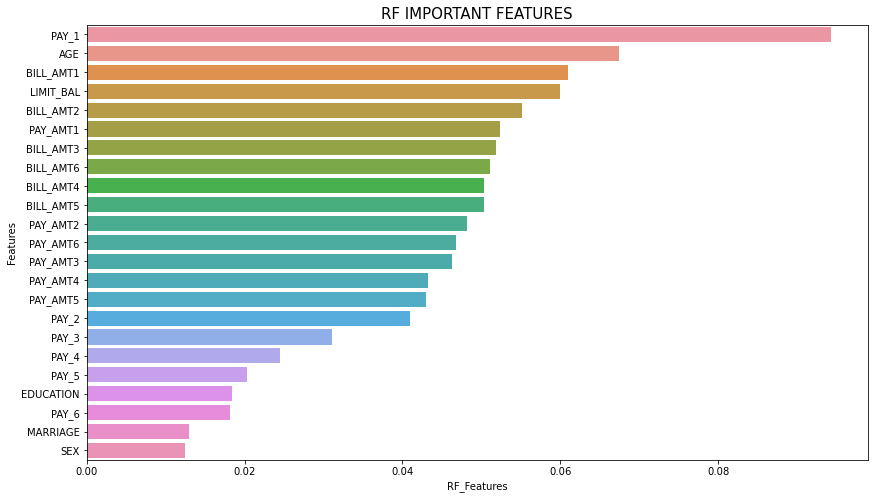

In [ ]:
plt.figure(figsize=(14,8))
sns.barplot(x='RF_Features',y='Features',data=rf_imp_features)
plt.title('RF IMPORTANT FEATURES',size = 15)
plt.show()

## 2. Display the important features of AdaBoost Classifier

In [ ]:
adb_imp_features = feature_importance_df.sort_values(by ='AdaBoost_Features' ,ascending = False)
adb_imp_features

,Features,RF_Features,AdaBoost_Features,GB_Features,XGB_Features,LGB_Features
5,PAY_1,0.094243,0.14,0.616385,0.377159,98
11,BILL_AMT1,0.060917,0.12,0.029876,0.023537,213
18,PAY_AMT2,0.048174,0.10,0.020449,0.022650,205
12,BILL_AMT2,0.055161,0.06,0.009788,0.021952,173
19,PAY_AMT3,0.046291,0.06,0.021685,0.024378,177
13,BILL_AMT3,0.051900,0.06,0.007632,0.020486,161
0,LIMIT_BAL,0.059995,0.06,0.031109,0.023286,236
6,PAY_2,0.041009,0.06,0.088202,0.117947,44
14,BILL_AMT4,0.050327,0.04,0.007282,0.020854,152
15,BILL_AMT5,0.050284,0.04,0.005615,0.019574,142


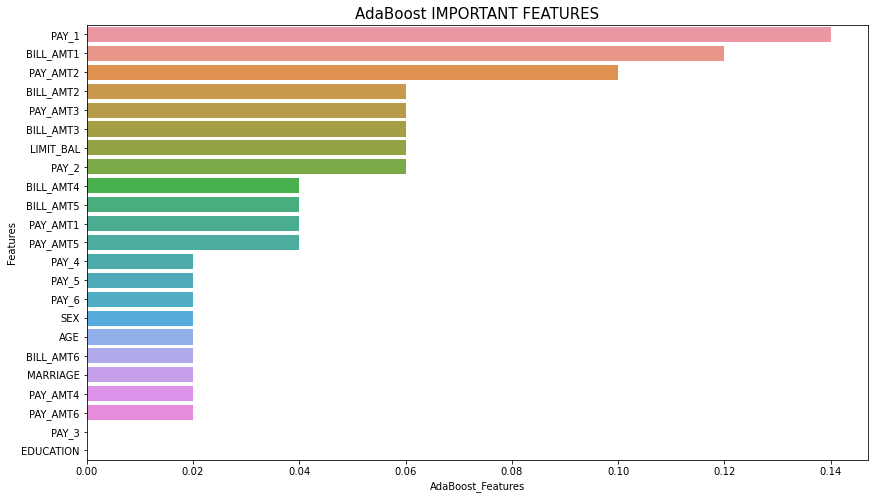

In [ ]:
plt.figure(figsize=(14,8))
sns.barplot(x='AdaBoost_Features',y='Features',data=adb_imp_features)
plt.title('AdaBoost IMPORTANT FEATURES',size = 15)
plt.show()

# THE END!!!